### Topic Modeling

Here we present three methods
1. Latent Dirichlet allocation (LDA)
2. Non-negative Matric Factorization (NMF)
3. Clustering with K-means (tried two embedding methods)

The best result is using NMF with TF-IDF vectorization since it is more suitable for short texts like twitter data.

In [83]:
import pandas as pd
import json
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.cluster import KMeansClusterer
import string
import spacy
import en_core_web_sm
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import Word2Vec
import pprint
from operator import itemgetter

from sklearn import cluster, metrics

import seaborn
import matplotlib.pyplot as plt

from wordcloud import WordCloud

from Data_Processor import clean, Data_Processor

#### Data clean

In [84]:
DP=Data_Processor(start_month='2017-07',end_month='2020-05',
                  template=["../../Data/TDAmeritrade", "../../Data/CharlesSchwab"])
DP.readdata()
print(DP.datanums())
DP.specifylang()
DP.removenoise() 
DP.clean()

([4595, 5955, 4689, 6305, 5638, 7616, 6629, 6886, 6730, 7852, 6228, 7225, 5338, 5014, 5777, 8095, 5153, 5648, 5986, 5346, 5183, 7338, 8259, 7059, 6153, 4725, 5025, 9961, 8858, 5964, 6177, 6385, 9195, 8665, 8516], 230168)


In [85]:
#after removing noises (delete promotional/advertisement data)
print(DP.datanums())

([1914, 2732, 2013, 2766, 2355, 3286, 2926, 3850, 3784, 4184, 2982, 3863, 2330, 2436, 3307, 3892, 2590, 2957, 2673, 2539, 2588, 3610, 4146, 4296, 2829, 2404, 2411, 4871, 4125, 2875, 3392, 3677, 6142, 5324, 5329], 117398)


In [86]:
DP.tokenizetext()

In [87]:
DP.textdata()['2017-12'][:3]

['icymi td ameritrade actuates cboe future contract trading coinspeaker',
 'spending time loved one greatest investment happy holiday family',
 'eva hope youre terrific christmas personally ive incredible year market much success go investor education taught brandonvanzee davidsettle benwatsontda coach investools tdameritrade']

In [88]:
months = list(DP.textdata().keys())
print(months)

['2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05']


In [89]:
spacy_nlp = en_core_web_sm.load()
extract_words = {}

# Part-of-speech tagging (here extract nones)
def pos_tagging(data):
    req_tag = ['NN']
    list_words = []
    try:
        for x in data:
            doc = spacy_nlp(x)
            words = []
            for token in doc:
                if token.tag_ in req_tag and token.shape_ != 'x' and token.shape_ != 'xx' and token.shape_ != 'xxx':
                    words.append(token.lemma_)
            if words:
                list_words.append(words)
        return list_words
    except Exception as e:
        return list_words

In [90]:
for m in months:
    print("pos tagging",m)
    extract_words[m] = pos_tagging(DP.textdata()[m])

pos tagging 2017-07
pos tagging 2017-08
pos tagging 2017-09
pos tagging 2017-10
pos tagging 2017-11
pos tagging 2017-12
pos tagging 2018-01
pos tagging 2018-02
pos tagging 2018-03
pos tagging 2018-04
pos tagging 2018-05
pos tagging 2018-06
pos tagging 2018-07
pos tagging 2018-08
pos tagging 2018-09
pos tagging 2018-10
pos tagging 2018-11
pos tagging 2018-12
pos tagging 2019-01
pos tagging 2019-02
pos tagging 2019-03
pos tagging 2019-04
pos tagging 2019-05
pos tagging 2019-06
pos tagging 2019-07
pos tagging 2019-08
pos tagging 2019-09
pos tagging 2019-10
pos tagging 2019-11
pos tagging 2019-12
pos tagging 2020-01
pos tagging 2020-02
pos tagging 2020-03
pos tagging 2020-04
pos tagging 2020-05


In [91]:
with open('extract_words_tdameritrade.txt','w') as file:
     file.write(json.dumps(extract_words)) # use `json.loads` to do the reverse

### Method 1: LDA

In [92]:
lda = {}
def LDA(texts,topics=10,num_words=15):
    dictionary = corpora.Dictionary(texts) # texts: list of list of words
    corpus = [dictionary.doc2bow(text) for text in texts]
    num_topics = topics #The number of topics that should be generated
    passes = 20
    lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=passes)
    #pp = pprint.PrettyPrinter(indent=4)
    #pp.pprint(lda.print_topics(num_words=num_words))
    
    # correlation between a tweet and each topic
    #pp.pprint(sorted(lda.get_document_topics(corpus[0],minimum_probability=0,per_word_topics=False),key=itemgetter(1),reverse=True))
    return lda

In [93]:
for m in months:
    print("lda modeling", m)
    lda[m] = LDA(extract_words[m], topics=10, num_words=15)

lda modeling 2017-07
lda modeling 2017-08
lda modeling 2017-09
lda modeling 2017-10
lda modeling 2017-11
lda modeling 2017-12
lda modeling 2018-01
lda modeling 2018-02
lda modeling 2018-03
lda modeling 2018-04
lda modeling 2018-05
lda modeling 2018-06
lda modeling 2018-07
lda modeling 2018-08
lda modeling 2018-09
lda modeling 2018-10
lda modeling 2018-11
lda modeling 2018-12
lda modeling 2019-01
lda modeling 2019-02
lda modeling 2019-03
lda modeling 2019-04
lda modeling 2019-05
lda modeling 2019-06
lda modeling 2019-07
lda modeling 2019-08
lda modeling 2019-09
lda modeling 2019-10
lda modeling 2019-11
lda modeling 2019-12
lda modeling 2020-01
lda modeling 2020-02
lda modeling 2020-03
lda modeling 2020-04
lda modeling 2020-05


In [14]:
## save the model
# for m in lda:
#    lda[m].save('lda_'+m+'.model')

Text(0.5, 0.98, '2018 Feb - Inconvenience, security')

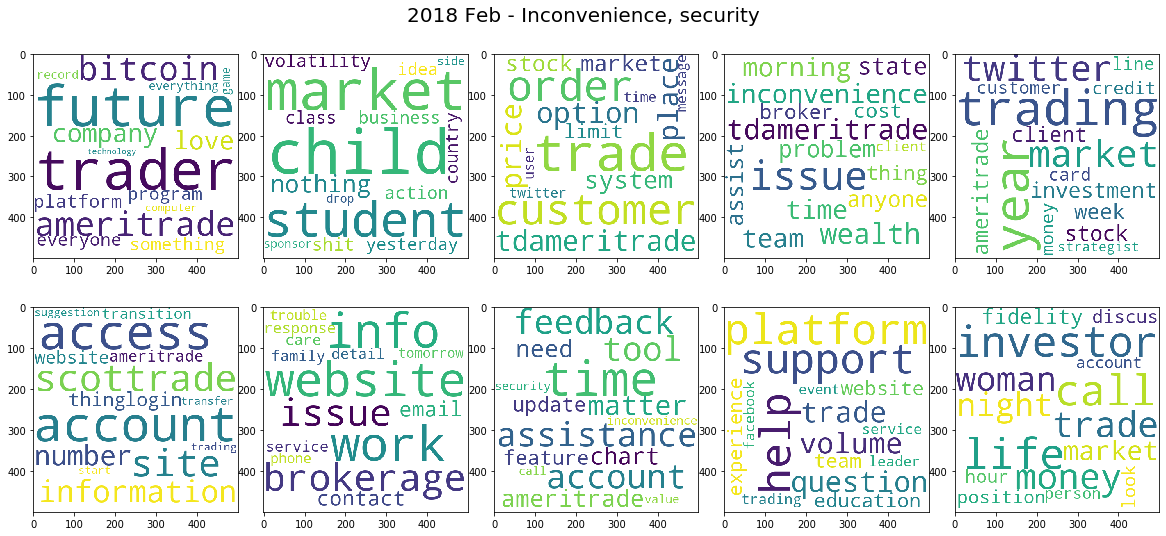

In [104]:
fig, axs = plt.subplots(2,5, figsize = (16, 8))
i = 0
for i in range(10):
    m = '2018-02'
    topic = " ".join([w for w,p in lda[m].show_topic(i, 15)])
    wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(topic) 
    # plot the WordCloud image                        
    axs[i//5][i%5].imshow(wordcloud) 
    
    fig.tight_layout(pad = 0) 
fig.suptitle("2018 Feb - Inconvenience, security", fontsize=20)

Text(0.5, 0.98, '2020 May - Issue, patience (second row first one)')

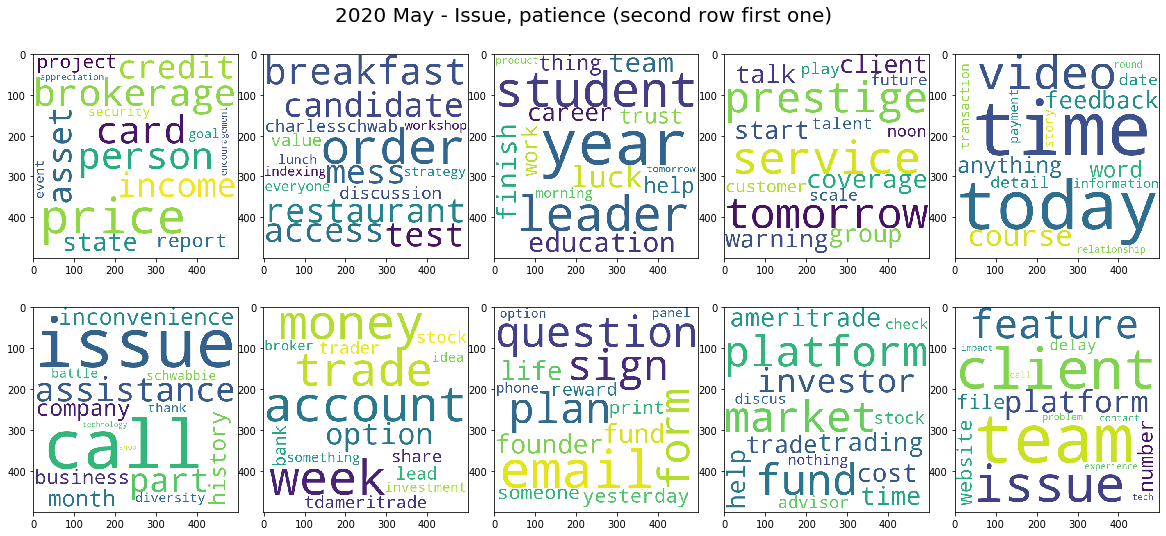

In [103]:
fig, axs = plt.subplots(2,5, figsize = (16, 8))
i = 0
for i in range(10):
    m = '2019-02'
    topic = " ".join([w for w,p in lda[m].show_topic(i, 15)])
    wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(topic) 
    # plot the WordCloud image                        
    axs[i//5][i%5].imshow(wordcloud) 
    
    fig.tight_layout(pad = 0) 
fig.suptitle("2019 Feb - Issue, patience (second row first one)", fontsize=20)

Text(0.5, 0.98, '2020 Feb - Inconvenience, issue (first row first & last one)')

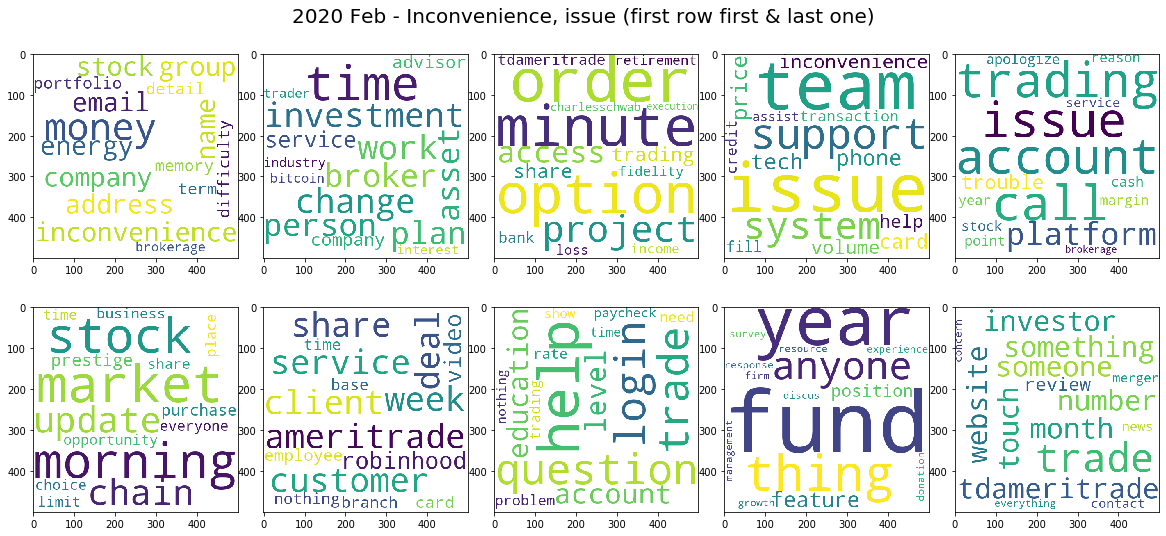

In [98]:
fig, axs = plt.subplots(2,5, figsize = (16, 8))

# topic 2 in 2020 Feb
for i in range(10):
    m = '2020-02'
    topic = " ".join([w for w,p in lda[m].show_topic(i, 15)])
    wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(topic) 
    # plot the WordCloud image                        
    axs[i//5][i%5].imshow(wordcloud) 
    fig.tight_layout(pad = 0) 

fig.suptitle("2020 Feb - Inconvenience, issue (first row first & last one)", fontsize=20)

In [101]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda['2020-05'].print_topics(num_words=15))

[   (   0,
        '0.070*"hour" + 0.037*"phone" + 0.020*"security" + 0.019*"world" + '
        '0.018*"position" + 0.016*"question" + 0.015*"password" + '
        '0.015*"answer" + 0.015*"money" + 0.014*"tdameritrade" + 0.014*"site" '
        '+ 0.014*"nobody" + 0.014*"platform" + 0.013*"strategy" + '
        '0.013*"case"'),
    (   1,
        '0.055*"number" + 0.043*"investor" + 0.032*"someone" + 0.025*"golf" + '
        '0.024*"name" + 0.017*"family" + 0.016*"company" + 0.015*"move" + '
        '0.015*"year" + 0.015*"list" + 0.014*"experience" + 0.013*"hope" + '
        '0.013*"tournament" + 0.012*"line" + 0.012*"discus"'),
    (   2,
        '0.067*"account" + 0.054*"team" + 0.049*"call" + 0.040*"support" + '
        '0.036*"website" + 0.034*"issue" + 0.031*"assistance" + 0.025*"chat" + '
        '0.019*"client" + 0.019*"tech" + 0.019*"information" + 0.018*"service" '
        '+ 0.015*"link" + 0.015*"type" + 0.015*"place"'),
    (   3,
        '0.092*"market" + 0.034*"month" + 0.0

### Method 2 Non-negative Natrix Factorization (NMF)

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
stop = set(stopwords.words('english'))
stop.update(('http','llc','inc', 'twitter', 'tweet', 'tdameritrade','ameritrade', 'cuz', 'td'))

doc_term_matrix = {}
tfidf_vect = {}
nmf = {}

In [106]:
for m in months:
    tfidf_vect[m] = TfidfVectorizer(max_df=0.8, min_df=2, stop_words=stop)
    #doc_term_matrix[m] = tfidf_vect[m].fit_transform(DP.textdata()[m])
    topic = [" ".join(token) for token in extract_words[m]] #use only extracted none words here has better result
    doc_term_matrix[m] = tfidf_vect[m].fit_transform(topic)
    nmf[m] = NMF(n_components=10, random_state=42)
    nmf[m].fit(doc_term_matrix[m])

Text(0.5, 0.98, '2017 Dec - Error, Inconvenience, Troubleshoot (second row fourth one)')

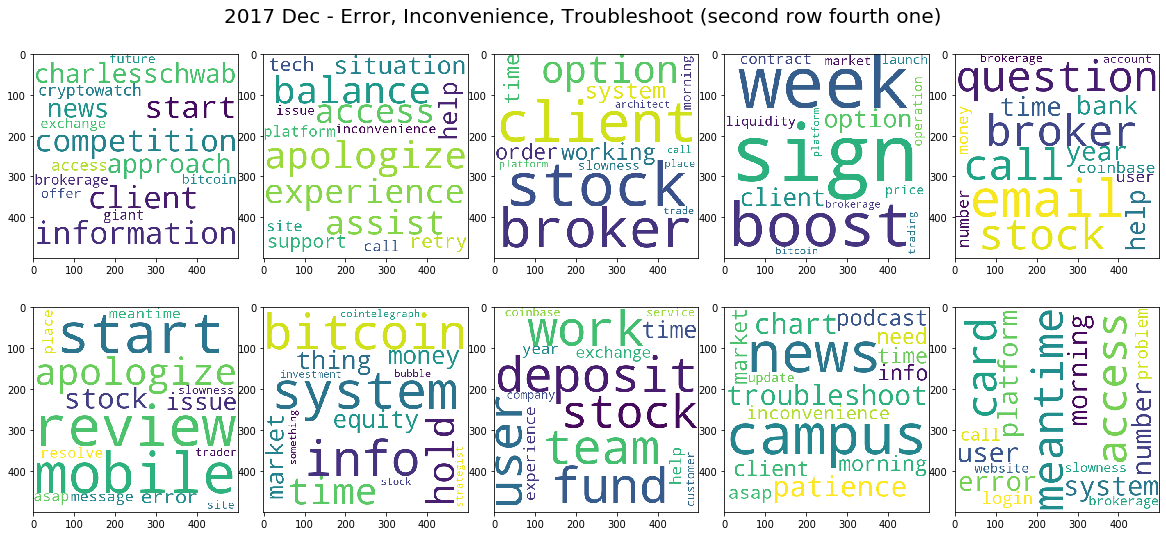

In [110]:
fig, axs = plt.subplots(2,5, figsize = (16, 8))
i = 0
for i in range(10):
    m = '2017-12'
    topic = " ".join([tfidf_vect[m].get_feature_names()[i] for i in nmf[m].components_[i].argsort()[-15:]])
    wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(topic) 
    # plot the WordCloud image                        
    axs[i//5][i%5].imshow(wordcloud) 
    
    fig.tight_layout(pad = 0) 

fig.suptitle("2017 Dec - Error, Inconvenience, Troubleshoot (second row fourth one)", fontsize=20)

Text(0.5, 0.98, '2020 May - Inconvenience, Issue (first row last one)')

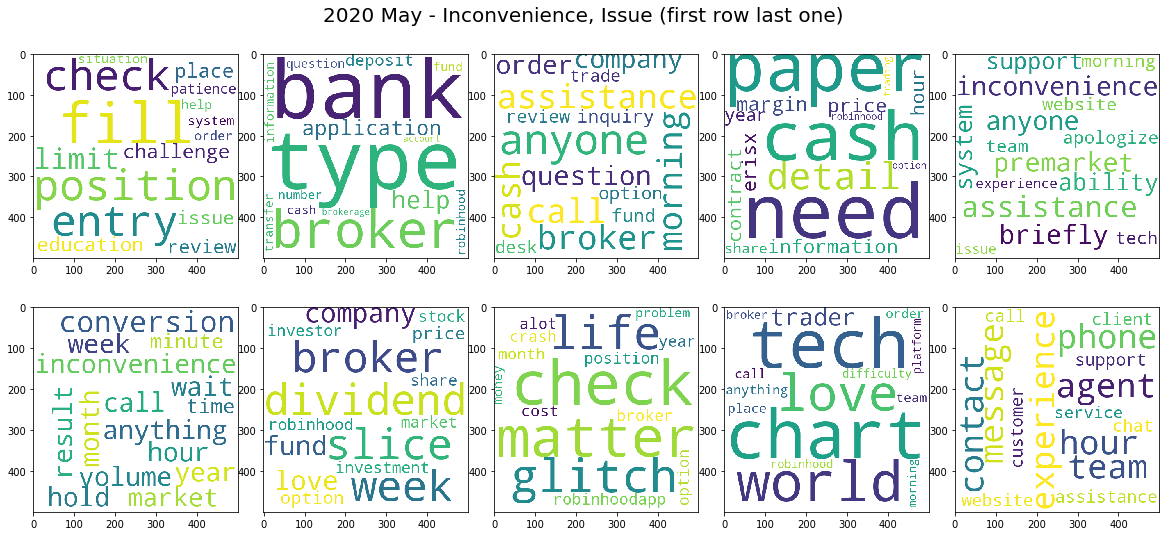

In [109]:
fig, axs = plt.subplots(2,5, figsize = (16, 8))
i = 0
for i in range(10):
    m = '2020-05'
    topic = " ".join([tfidf_vect[m].get_feature_names()[i] for i in nmf[m].components_[i].argsort()[-15:]])
    wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10).generate(topic) 
    # plot the WordCloud image                        
    axs[i//5][i%5].imshow(wordcloud) 
    
    fig.tight_layout(pad = 0) 
    
fig.suptitle("2020 May - Inconvenience, Issue (first row last one)", fontsize=20)

In [111]:
m = '2020-05'
for i,topic in enumerate(nmf[m].components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vect[m].get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['challenge', 'place', 'education', 'review', 'issue', 'patience', 'situation', 'system', 'help', 'order']


Top 10 words for topic #1:
['deposit', 'question', 'transfer', 'fund', 'number', 'information', 'robinhood', 'cash', 'brokerage', 'account']


Top 10 words for topic #2:
['cash', 'question', 'company', 'order', 'inquiry', 'fund', 'review', 'option', 'desk', 'trade']


Top 10 words for topic #3:
['price', 'margin', 'hour', 'contract', 'erisx', 'year', 'share', 'robinhood', 'option', 'trading']


Top 10 words for topic #4:
['ability', 'system', 'support', 'apologize', 'website', 'tech', 'team', 'morning', 'experience', 'issue']


Top 10 words for topic #5:
['year', 'call', 'wait', 'week', 'month', 'hold', 'hour', 'market', 'minute', 'time']


Top 10 words for topic #6:
['love', 'fund', 'option', 'price', 'investment', 'robinhood', 'investor', 'share', 'market', 'stock']


Top 10 words for topic #7:
['cost', 'option', 'position', 'month', 'alot', 'broker'

### Method 3  Clustering (K-means)

1. #### Word2Vec Embedding

In [112]:
word2vec_model = {}
word_vectors = {}
cluster_words = {}

from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [113]:
token_data = {}

In [114]:
k = '2020-05'

#must trandform string to token here (as word2vec only accepts tokenized data)
token_data[k] = [s.split() for s in DP.textdata()[k]]
word2vec_model[k] = Word2Vec(token_data[k], min_count = 1, size=32)
word_vectors[k] = word2vec_model[k].wv.syn0
num_clusters = 10

# Initalize a k-means object and use it to extract centroids

kmeans_clustering = KMeans(n_clusters = num_clusters)
idx = kmeans_clustering.fit_predict(word_vectors[k])

word_centroid_map = dict(zip(word2vec_model[k].wv.index2word, idx))

for cluster in range(10):
    # Print the cluster number
    # print("\nCluster %d" % cluster)
    # Find all of the words for that cluster number, and print them out
    
    nlen = len(word_centroid_map)
    keys = list(word_centroid_map.keys())
    values = list(word_centroid_map.values())
    for i in range(nlen):
        if(values[i] == cluster):
            cluster_words[cluster] = cluster_words.get(cluster,"") + " " + keys[i]


C:\Users\hwk97\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


Text(0.5, 0.98, '2020 May')

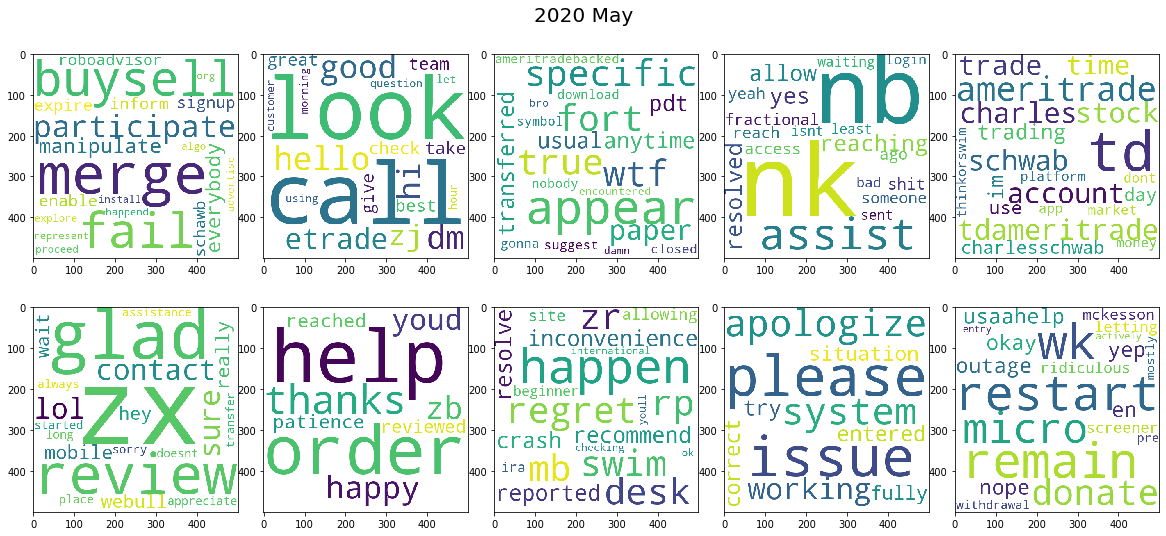

In [115]:
fig, axs = plt.subplots(2,5, figsize = (16, 8))
for i in range(10):
    topic = cluster_words[i]
    #" ".join([tfidf_vect[k].get_feature_names()[i] for i in nmf[k].components_[i].argsort()[-10:]])
    wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', max_words=20,
                min_font_size = 10).generate(topic) 
    # plot the WordCloud image                        
    axs[i//5][i%5].imshow(wordcloud) 
    
    fig.tight_layout(pad = 0) 
    
fig.suptitle("2020 May", fontsize=20)

#### 2. TF-IDF Embedding

In [116]:
tfidf_vect = {}
tfidf = {}
kmeans_tfidf = {}

In [117]:
for k in months:
    tfidf_vect[k] = TfidfVectorizer(stop_words=stop)
    tfidf[k] = tfidf_vect[k].fit_transform(DP.textdata()[k])
    # k-means fit
    kmeans_tfidf[k] = KMeans(n_clusters=20).fit(tfidf[k])

#kmeans = KMeans(n_clusters = 10)
#idx = kmeans.fit_predict(tfidf)

Text(0.5, 0, 'frequencey')

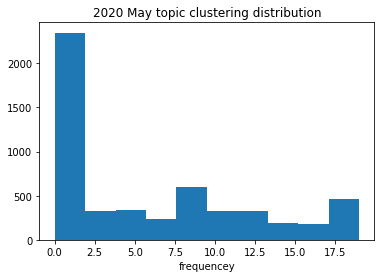

In [124]:
k = '2020-05'
plt.title("2020 May topic clustering distribution")
plt.hist(kmeans_tfidf[k].labels_)
plt.xlabel('topic')
plt.xlabel('frequencey')

In [125]:
cluster_words = {}

for i in set(kmeans_tfidf[k].labels_):
    current_cluster = [DP.textdata()[k][x] for x in np.where(kmeans_tfidf[k].labels_ == i)[0]]
    cluster_words[i] = list(set(current_cluster))

Text(0.5, 0.98, '2020 May')

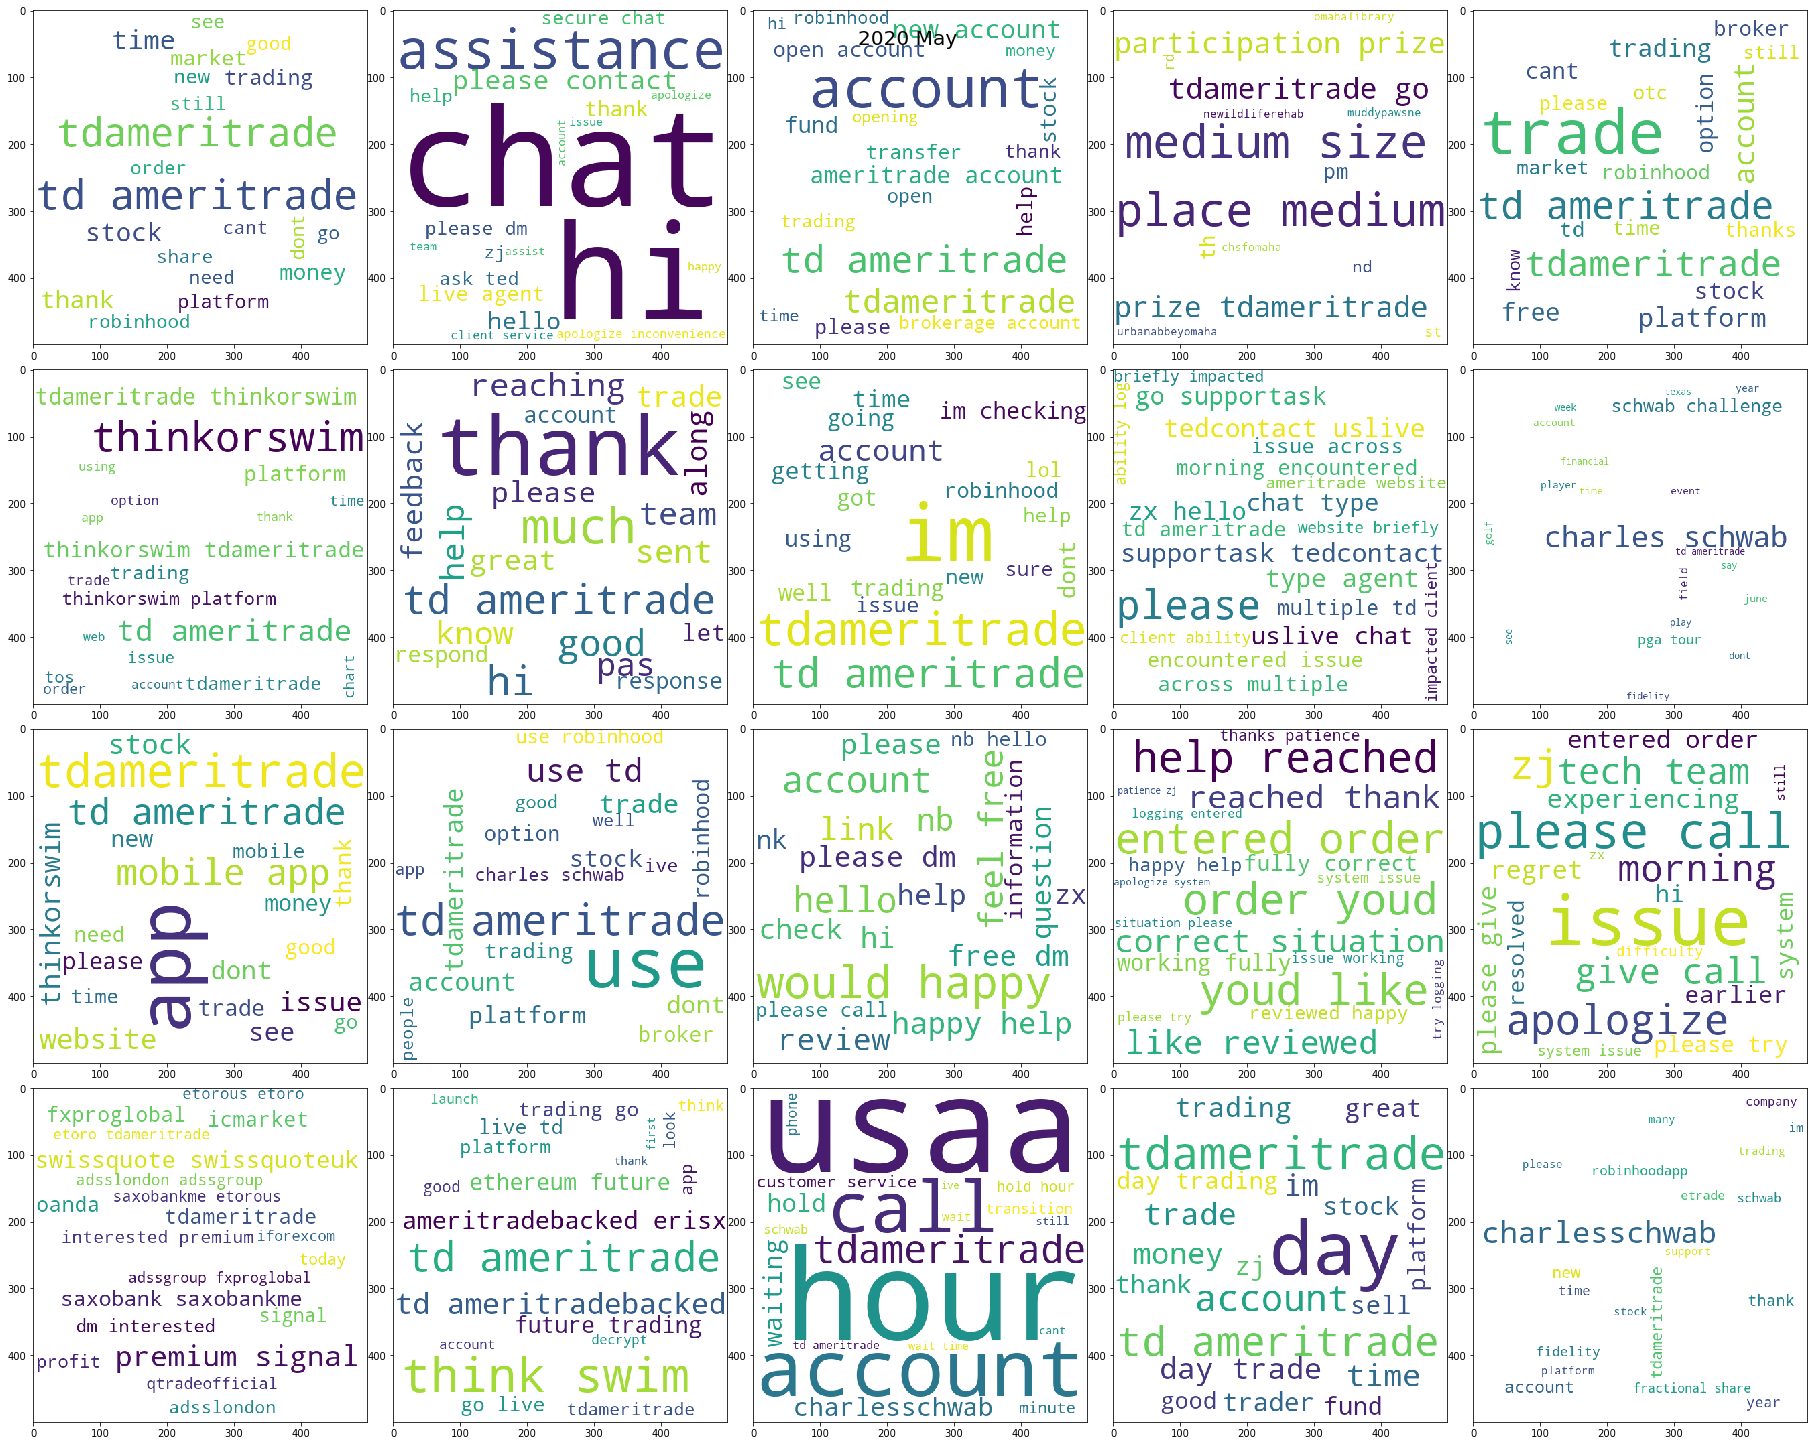

In [126]:
fig, axs = plt.subplots(4,5, figsize = (25, 20))
for i in range(20):
    topic = " ".join(cluster_words[i])
    wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', max_words=20,
                min_font_size = 10).generate(topic) 
    # plot the WordCloud image                        
    axs[i//5][i%5].imshow(wordcloud) 
    
    fig.tight_layout(pad = 0) 
    
fig.suptitle("2020 May", fontsize=20)

In [127]:
kmeans_tfidf[k].cluster_centers_

array([[0.00013128, 0.00062292, 0.00120009, ..., 0.00011332, 0.00018361,
        0.00238938],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00467835],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00632299],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00203235],
       [0.        , 0.        , 0.00129414, ..., 0.        , 0.        ,
        0.00248091],
       [0.        , 0.        , 0.00083695, ..., 0.        , 0.        ,
        0.        ]])

In [128]:
## Use  t-SNE to visualize

from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
n = 20
tfs_reduced = TruncatedSVD(n_components=2, random_state=0).fit_transform(tfidf[k])
tfs_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(tfs_reduced)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5329 samples in 0.004s...
[t-SNE] Computed neighbors for 5329 samples in 0.274s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5329
[t-SNE] Computed conditional probabilities for sample 2000 / 5329
[t-SNE] Computed conditional probabilities for sample 3000 / 5329
[t-SNE] Computed conditional probabilities for sample 4000 / 5329
[t-SNE] Computed conditional probabilities for sample 5000 / 5329
[t-SNE] Computed conditional probabilities for sample 5329 / 5329
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.813s
[t-SNE] Iteration 50: error = 78.7037201, gradient norm = 0.0490832 (50 iterations in 2.923s)
[t-SNE] Iteration 100: error = 64.9347763, gradient norm = 0.0079536 (50 iterations in 2.636s)
[t-SNE] Iteration 150: error = 62.0080872, gradient norm = 0.0046988 (50 iterations in 2.457s)
[t-SNE] Iteration 200: error = 60.8286667, gradient norm = 0.0034294 (50 iterations in 2.541s)
[

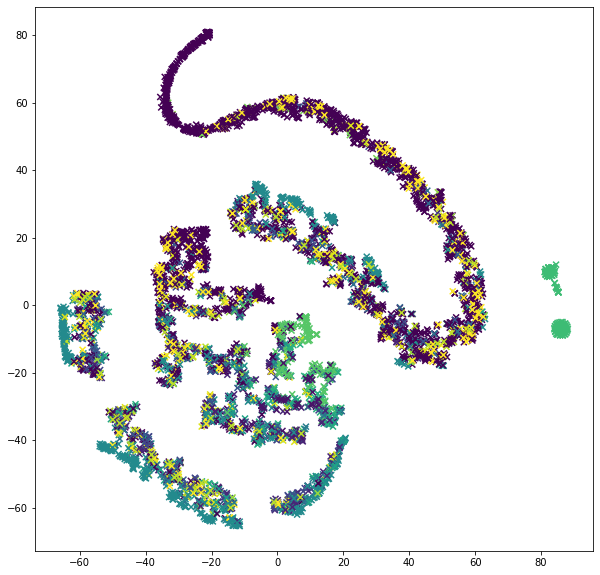

In [129]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.scatter(tfs_embedded[:, 0], tfs_embedded[:, 1], marker = "x", c = kmeans_tfidf[k].labels_)
plt.show()